<a href="https://colab.research.google.com/github/PrinceArya/FACE-VERIFICATION-USING-SIAMESE-NETWORK/blob/master/Face_Verification_Using_Siamese_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA LOADING



In [1]:
!pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d jessicali9530/lfw-dataset

 98% 110M/112M [00:00<00:00, 103MB/s]  
100% 112M/112M [00:01<00:00, 116MB/s]


In [5]:
!unzip lfw-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0029.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0030.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Si

In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("pairs.csv")

In [8]:
data.head()

,name,imagenum1,imagenum2,Unnamed: 3
0,Abel_Pacheco,1,4,NaN
1,Akhmed_Zakayev,1,3,NaN
2,Akhmed_Zakayev,2,3,NaN
3,Amber_Tamblyn,1,2,NaN
4,Anders_Fogh_Rasmussen,1,3,NaN


#DATA PREPARATION

In [9]:
data = data.fillna(-1)

In [10]:
Matched_pair = data[data['Unnamed: 3']==-1].copy()

In [11]:
Unmatched_pair = data[data['Unnamed: 3']!=-1].copy()

In [12]:
convert_dict = {
    "name":str,
    "imagenum1":str,
    "imagenum2":str,
    "label":int}

In [13]:
Matched_pair["label"]=1
Unmatched_pair["label"]=0

In [14]:
Matched_pair = Matched_pair.astype(convert_dict)

In [15]:
Unmatched_pair=Unmatched_pair.astype(convert_dict)

In [16]:
def lead(x):
  if (len(x)==1):
    x = "000"+x
  elif (len(x)==2):
    x = "00"+x
  elif (len(x)==3):
    x = '0'+x
  return x

In [17]:
Matched_pair["imagenum1"]=Matched_pair["imagenum1"].apply(lambda x: lead(x) )
Matched_pair["imagenum2"]=Matched_pair["imagenum2"].apply(lambda x: lead(x) )

In [18]:
Matched_pair.head()

,name,imagenum1,imagenum2,Unnamed: 3,label
0,Abel_Pacheco,0001,0004,-1.0,1
1,Akhmed_Zakayev,0001,0003,-1.0,1
2,Akhmed_Zakayev,0002,0003,-1.0,1
3,Amber_Tamblyn,0001,0002,-1.0,1
4,Anders_Fogh_Rasmussen,0001,0003,-1.0,1


In [19]:
Matched_pair["imagenum1"]=Matched_pair["name"]+"/"+Matched_pair["name"]+'_'+Matched_pair["imagenum1"]+".jpg"

In [20]:
Matched_pair["imagenum2"]=Matched_pair["name"]+"/"+Matched_pair["name"]+'_'+Matched_pair["imagenum2"]+".jpg"

In [21]:
Matched_pair=Matched_pair.drop(columns=['name','Unnamed: 3'])

In [22]:
Matched_pair.head()

,imagenum1,imagenum2,label
0,Abel_Pacheco/Abel_Pacheco_0001.jpg,Abel_Pacheco/Abel_Pacheco_0004.jpg,1
1,Akhmed_Zakayev/Akhmed_Zakayev_0001.jpg,Akhmed_Zakayev/Akhmed_Zakayev_0003.jpg,1
2,Akhmed_Zakayev/Akhmed_Zakayev_0002.jpg,Akhmed_Zakayev/Akhmed_Zakayev_0003.jpg,1
3,Amber_Tamblyn/Amber_Tamblyn_0001.jpg,Amber_Tamblyn/Amber_Tamblyn_0002.jpg,1
4,Anders_Fogh_Rasmussen/Anders_Fogh_Rasmussen_00...,Anders_Fogh_Rasmussen/Anders_Fogh_Rasmussen_00...,1


In [23]:
Unmatched_pair['Unnamed: 3']=Unmatched_pair['Unnamed: 3'].astype(int)

In [24]:
convert_dict = {
    "name":str,
    "imagenum1":str,
    "imagenum2":str,
    "Unnamed: 3":str,
    "label":int}

In [25]:
Unmatched_pair = Unmatched_pair.astype(convert_dict)

In [26]:
Unmatched_pair["imagenum1"]=Unmatched_pair["imagenum1"].apply(lambda x: lead(x) )
Unmatched_pair["Unnamed: 3"]=Unmatched_pair["Unnamed: 3"].apply(lambda x: lead(x) )

In [27]:
Unmatched_pair['imagenum1'] = Unmatched_pair['name']+'/'+Unmatched_pair['name']+'_'+Unmatched_pair['imagenum1']+'.jpg'

In [28]:
Unmatched_pair['imagenum2']=Unmatched_pair['imagenum2']+'/'+Unmatched_pair['imagenum2']+'_'+Unmatched_pair["Unnamed: 3"]+'.jpg'

In [29]:
Unmatched_pair = Unmatched_pair.drop(columns=["name","Unnamed: 3"])

In [30]:
Unmatched_pair.head()

,imagenum1,imagenum2,label
300,Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg,Dean_Barker/Dean_Barker_0001.jpg,0
301,Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg,Giancarlo_Fisichella/Giancarlo_Fisichella_0001...,0
302,Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg,Mikhail_Gorbachev/Mikhail_Gorbachev_0001.jpg,0
303,Abdul_Rahman/Abdul_Rahman_0001.jpg,Portia_de_Rossi/Portia_de_Rossi_0001.jpg,0
304,Abel_Pacheco/Abel_Pacheco_0001.jpg,Jong_Thae_Hwa/Jong_Thae_Hwa_0002.jpg,0


In [31]:

df = pd.concat([Matched_pair,Unmatched_pair],axis=0)

In [32]:
df.shape

(6000, 3)

#DATA SPLITTING

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_val,y_train,y_val = train_test_split(df,df["label"],test_size=0.2,shuffle=True,stratify=df["label"])
x_train.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True, inplace=True)




In [35]:
import torch
import os
import cv2
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.image as mpimg
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

Dir = '/content/lfw-deepfunneled/lfw-deepfunneled'

#CUSTOM DATALOADER(TRAIN+TEST)

In [36]:
class Data(Dataset):

  def __init__(self,Dir,df,transform,train=True):
    self.df =df
    self.dir = Dir
    self.transform = transform
    self.train = train
    self.len =df.shape[0]
  def __len__(self):
    return self.len

  def __getitem__(self,idx):
    img_pth1 = os.path.join(self.dir,self.df["imagenum1"].loc[idx])
    img_pth2 = os.path.join(self.dir,self.df["imagenum2"].loc[idx])
    if (self.train):
      label = self.df["label"].loc[idx]
    img1 = mpimg.imread(img_pth1)
    img2 = mpimg.imread(img_pth2)
    img1 = cv2.resize(img1,(128,128))
    img2 = cv2.resize(img2,(128,128))
    if (self.transform):
      img1 = self.transform(img1)
      img2 = self.transform(img2)
    if (self.train==False):
      return img1,img2
    else:
      return img1,img2,label 


##AUGUMENTATION+TRANSFORMATION

In [37]:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])


data_augment = [transforms.RandomHorizontalFlip(p=0.5),transforms.CenterCrop(64)]

train_transf = transforms.Compose([transforms.ToPILImage(),
                                   transforms.RandomApply(data_augment, p=0.5),
                                   transforms.Resize(64),
                                   transforms.ToTensor(),
                                   normalize])

valid_transf = transforms.Compose([transforms.ToPILImage(),
                                   transforms.RandomApply(data_augment, p=0.5),
                                   transforms.Resize(64),
                                   transforms.ToTensor(),
                                   normalize])

In [38]:
train_dataset = Data(Dir,x_train,transform=train_transf,train=True)
valid_dataset = Data(Dir,x_val,transform=valid_transf,train=True)

In [39]:


batch_size=256
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
val_loader = DataLoader(dataset=valid_dataset,batch_size=batch_size,shuffle=True)

In [40]:
import torchvision

In [41]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


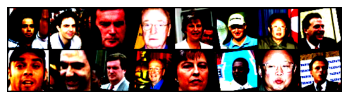

[1 1 1 1 1 0 1 1]


In [42]:
temp_data_loader = DataLoader(train_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=8)

data_iter = iter(temp_data_loader)
eg_batch = next(data_iter)
concatenated = torch.cat((eg_batch[0],eg_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(eg_batch[2].numpy())

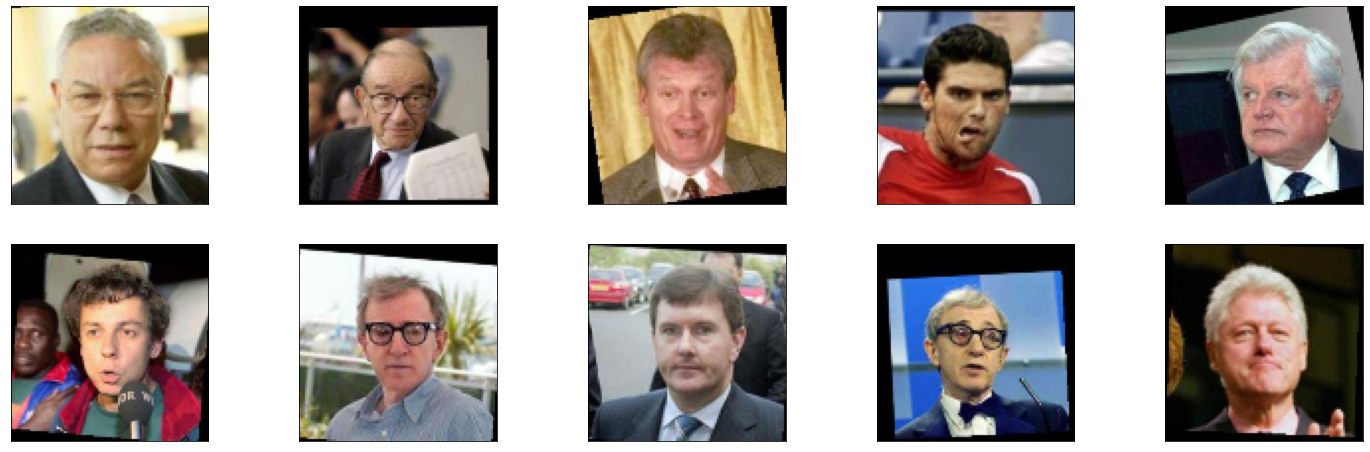

In [43]:
fig = plt.figure(figsize=(25, 8))
for i, idx in enumerate(np.random.choice(x_train.index, 10)):
    ax = fig.add_subplot(2, 10//2, i+1, xticks=[], yticks=[])
    pth1 = os.path.join(Dir,x_train.imagenum1[idx])
    im1 = mpimg.imread(pth1)
    im1 = cv2.resize(im1, (100, 100)) 
    plt.imshow(im1, cmap="hot")

# Siamese Network without Contrastive Loss

In [44]:
class Siamesis(nn.Module):
    
    # Contructor
    def __init__(self):
        super(Siamesis, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(7,7),stride=1,padding=3)
        self.maxpool1=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), stride=(1,1),padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=(1,1),padding=1)
        self.maxpool3=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(1,1),padding=1)
        self.maxpool4=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), stride=(1,1),padding=1)
        self.maxpool5=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128,2)
        #self.fc3 = nn.Linear(75,2)

    def forward_once(self,x):

      x = self.cnn1(x)
      x = torch.relu(x)
      x = self.maxpool1(x)

      x = self.cnn2(x)
      x = torch.relu(x)
      x = self.maxpool2(x)

      x = self.cnn3(x)
      x = torch.relu(x)
      x = self.maxpool3(x)

      x = self.cnn4(x)
      x = torch.relu(x)
      x = self.maxpool4(x)

      x = self.cnn5(x)
      x = torch.relu(x)
      x = self.maxpool5(x)

      x = x.view(x.size(0),-1)
      x = self.fc1(x)
      x = torch.tanh(x)

      #x = self.fc2(x)
      #x =torch.relu(x)

      return x

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        temp = abs(output1-output2)
        temp = self.fc2(temp)
        return temp


In [45]:
model = Siamesis()

In [46]:
out = model(train_dataset[2][0].resize(1,3,64,64),train_dataset[2][1].resize(1,3,64,64))

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:358: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [47]:
out

tensor([[-0.0349,  0.0439]], grad_fn=<AddmmBackward>)

In [48]:
from tqdm import tqdm_notebook as tqdm

In [49]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
device

device(type='cuda', index=0)

In [50]:
#!pip install pytorch-ranger

In [51]:
!pip install torch-optimizer

     |████████████████████████████████| 40kB 2.0MB/s 


In [104]:
import torch_optimizer as optim
#from torch import optim

In [105]:
#torch.save(model.state_dict(), "/content/drive/My Drive/weights/model_wt.pth")
PATH="/content/drive/My Drive/weights/model_wt.pth"

In [106]:
model = Siamesis()

In [107]:
model.load_state_dict(torch.load(PATH), strict=False)
model = model.to(device)

In [108]:
criterion=nn.CrossEntropyLoss()
learning_rate=0.001

In [93]:
optimizer = optim.Ranger(model.parameters(), lr=0.005)
#optimizer=optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [94]:
#optimizer = optim.DiffGrad(model.parameters(), lr=0.01)

In [95]:
# Train the model

n_epochs=2
cost_list=[]
accuracy_list=[]
N_test=len(valid_dataset)
COST=0

def train_model(n_epochs):
    for epoch in tqdm(range(n_epochs)):
        COST=0
        for x1,x2,y in train_loader:
            model.train()
            x1 = x1.to(device)
            x2 = x2.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            z = model(x1,x2)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test1,x_test2, y_test in val_loader:
            model.eval()
            x_test1 = x_test1.to(device)
            x_test2 = x_test2.to(device)
            y_test = y_test.to(device)
            z = model(x_test1,x_test2)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        print("Accuracy after",epoch," epoch is ",accuracy*100)
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

        
        
        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Accuracy after 0  epoch is  89.91666666666667
Accuracy after 1  epoch is  90.91666666666667



In [96]:
#torch.save(model.state_dict(), "/content/drive/My Drive/weights/model_wt.pth")

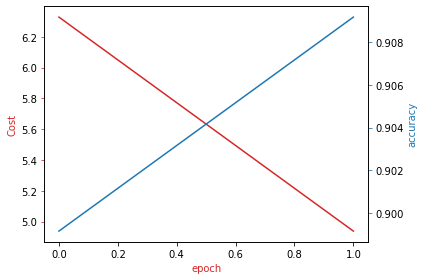

In [97]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [98]:
##Lets see some of the prediction

In [119]:
img1 = mpimg.imread("/content/modi1.jpg")#image of sir Narendra modi
img2 = mpimg.imread("/content/modi3.jpg")#image of sir Narendra modi
img3 = mpimg.imread("/content/obama.jpeg")#image of sir Obama

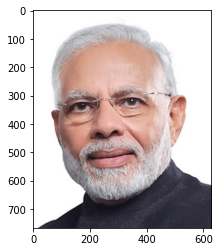

In [121]:
plt.imshow(img1)#image of sir Narendra modi

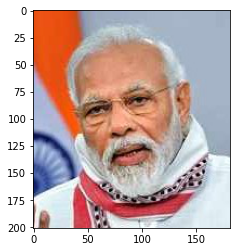

In [122]:
plt.imshow(img2)#image of sir Narendra modi

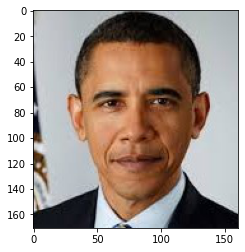

In [123]:
plt.imshow(img3)#image of sir Obama

Lets prepare above data for prediction


In [124]:
img1 = cv2.resize(img1,(64,64))
img2 = cv2.resize(img2,(64,64))
img3 = cv2.resize(img3,(64,64))

In [125]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.ToPILImage(),
                                   transforms.ToTensor(),
                                   normalize])
img1 = transform(img1)
img2 = transform(img2)
img3 = transform(img3)
img1 = img1.to(device)
img2 = img2.to(device)
img3 = img3.to(device)

In [126]:
out = model(img1.resize(1,3,64,64),img2.resize(1,3,64,64))

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:358: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [127]:
torch.softmax(out,dim=1) #89.56% confidence that input images are matched

tensor([[0.1044, 0.8956]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [128]:
out = model(img1.resize(1,3,64,64),img3.resize(1,3,64,64))

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:358: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [129]:
torch.softmax(out,dim=1)  #71.80% confidence that given images not matched

tensor([[0.7180, 0.2820]], device='cuda:0', grad_fn=<SoftmaxBackward>)

# Siamese Network with Contrastive Loss


In [130]:
class Siamesis(nn.Module):
    
    # Contructor
    def __init__(self):
        super(Siamesis, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(7,7),stride=1,padding=3)
        self.maxpool1=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), stride=(1,1),padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=(1,1),padding=1)
        self.maxpool3=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(1,1),padding=1)
        self.maxpool4=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.cnn5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), stride=(1,1),padding=1)
        self.maxpool5=nn.MaxPool2d(kernel_size=(2,2),stride=2)

        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128,16)
        #self.fc3 = nn.Linear(75,2)

    def forward_once(self,x):

      x = self.cnn1(x)
      x = torch.relu(x)
      x = self.maxpool1(x)

      x = self.cnn2(x)
      x = torch.relu(x)
      x = self.maxpool2(x)

      x = self.cnn3(x)
      x = torch.relu(x)
      x = self.maxpool3(x)

      x = self.cnn4(x)
      x = torch.relu(x)
      x = self.maxpool4(x)

      x = self.cnn5(x)
      x = torch.relu(x)
      x = self.maxpool5(x)

      x = x.view(x.size(0),-1)
      x = self.fc1(x)
      x = torch.tanh(x)

      return x

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        output1 = self.fc2(output1)
        output2 = self.fc2(output2)
        return output1, output2


In [ ]:
model = Siamesis()
model.to(device)

Siamesis(
  (cnn1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=16, bias=True)
)

In [ ]:
optimizer = optim.Ranger(model.parameters(), lr=0.005)
#optimizer=optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
import torch.nn.functional as F

In [ ]:
class ContrastiveLoss(torch.nn.Module):
    """
    Contrastive loss function.
    Based on: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


        return loss_contrastive

In [ ]:
criterion = ContrastiveLoss()

In [ ]:
out = model(train_dataset[2][0].resize(1,3,64,64).to(device),train_dataset[2][1].resize(1,3,64,64).to(device))
out

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:365: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


(tensor([[ 0.1067, -0.0081, -0.0550,  0.0906,  0.0663,  0.0045, -0.0579,  0.0298,
           0.0332, -0.0345, -0.0174, -0.0074, -0.0221, -0.0494, -0.0445, -0.0166]],
        device='cuda:0', grad_fn=<AddmmBackward>),
 tensor([[ 0.1115, -0.0057, -0.0551,  0.0905,  0.0656,  0.0040, -0.0570,  0.0276,
           0.0349, -0.0346, -0.0185, -0.0130, -0.0260, -0.0482, -0.0462, -0.0132]],
        device='cuda:0', grad_fn=<AddmmBackward>))

In [ ]:
# Train the model

n_epochs=40
cost_list=[]
N_test=len(valid_dataset)
COST=0
def train_model(n_epochs):
    for epoch in tqdm(range(n_epochs)):
        COST=0
        for x1,x2,y in train_loader:
            model.train()
            x1 = x1.to(device)
            x2 = x2.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            op1,op2 = model(x1,x2)
            loss = criterion(op1,op2,y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        print("Epoch:  ",epoch,"  ","Loss: ",COST)
        cost_list.append(COST)
     
train_model(n_epochs)

        
        
        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch:   0    Loss:  tensor(19.7776, device='cuda:0')
Epoch:   1    Loss:  tensor(19.7597, device='cuda:0')
Epoch:   2    Loss:  tensor(19.7305, device='cuda:0')
Epoch:   3    Loss:  tensor(19.7822, device='cuda:0')
Epoch:   4    Loss:  tensor(19.7223, device='cuda:0')
Epoch:   5    Loss:  tensor(19.6643, device='cuda:0')
Epoch:   6    Loss:  tensor(19.7573, device='cuda:0')
Epoch:   7    Loss:  tensor(19.7908, device='cuda:0')
Epoch:   8    Loss:  tensor(19.7386, device='cuda:0')
Epoch:   9    Loss:  tensor(19.7233, device='cuda:0')
Epoch:   10    Loss:  tensor(19.8293, device='cuda:0')
Epoch:   11    Loss:  tensor(20.0569, device='cuda:0')
Epoch:   12    Loss:  tensor(20.2169, device='cuda:0')
Epoch:   13    Loss:  tensor(20.1367, device='cuda:0')
Epoch:   14    Loss:  tensor(20.1198, device='cuda:0')
Epoch:   15    Loss:  tensor(20.2777, device='cuda:0')
Epoch:   16    Loss:  tensor(20.2481, device='cuda:0')
Epoch:   17    Loss:  tensor(20.6857, device='cuda:0')
Epoch:   18    Loss:

In [ ]:
img1 = mpimg.imread("/content/modi1.jpg")
img2 = mpimg.imread("/content/modi3.jpg")
img3 = mpimg.imread("/content/obama.jpeg")
img1 = cv2.resize(img1,(64,64))
img2 = cv2.resize(img2,(64,64))
img3 = cv2.resize(img3,(64,64))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.ToPILImage(),
                                   transforms.ToTensor(),
                                   normalize])
img1 = transform(img1)
img2 = transform(img2)
img3 = transform(img3)
img1 = img1.to(device)
img2 = img2.to(device)
img3 = img3.to(device)

In [ ]:
#concatenated = torch.cat((x0,x1),0)
output1,output2 = model(img1.resize(1,3,64,64),img2.resize(1,3,64,64))
euclidean_distance = F.pairwise_distance(output1, output2)
euclidean_distance

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:365: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([0.9791], device='cuda:0', grad_fn=<NormBackward1>)